In [1]:
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
# This assigns the coffeeshops data to a dataframe object that maps to the "df" variable
df = pd.read_csv("data/coffeeshops.csv")
df = df.drop_duplicates()

In [3]:
len(df)

313

In [4]:
df.name.value_counts()

Starbucks Coffee                   151
The Coffee Bean & Tea Leaf          31
Seattle's Best Coffee               15
Bo's Coffee                          7
UCC Vienna Café                      6
                                  ... 
Duvilan Café                         1
Roots and Herbs Coffee Shop          1
See's Cafe                           1
Bueno Cafe                           1
Dexter's Bakeshop & Coffee Shop      1
Name: name, Length: 92, dtype: int64

In [5]:
len(df)

313

In [5]:
df.describe()

,lat,lng,checkins
count,313.000000,313.000000,313.000000
mean,14.576405,121.036301,6261.146965
std,0.084305,0.039372,6268.944422
min,14.102268,120.860697,1.000000
25%,14.551362,121.019758,1159.000000
50%,14.575758,121.034795,4823.000000
75%,14.617451,121.056043,9390.000000
max,14.869520,121.251941,40149.000000


In [6]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True, popup = folium.Popup(row["name"], parse_html=True)).add_to(basemap)

basemap

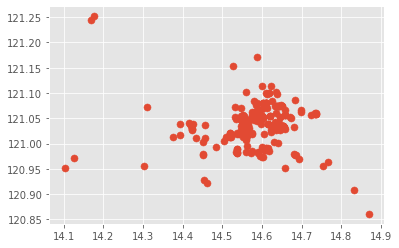

In [7]:
X = np.array(df[["lat", "lng"]].values.tolist())
plt.scatter(X[:, 0], X[:, 1], s=50)

In [8]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

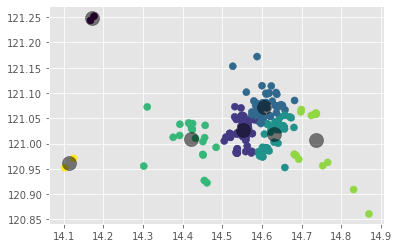

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [10]:
df["cluster"] = y_kmeans

In [11]:
df

,id,name,lat,lng,checkins,address,cluster
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)",5
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy",5
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave",5
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)",5
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City",1
...,...,...,...,...,...,...,...
4549,4ba4e69ef964a520dac038e3,Starbucks Coffee,14.610225,121.079915,6875,"4th Flr, Eastwood Mall",2
4557,4cc412bd3d7fa1cdb2a9a95f,Ghenne's Coffee Shop,14.603783,121.079698,208,Shopwise,2
4558,4e3758efd164374eb6867059,Dexter's Bakeshop & Coffee Shop,14.612650,121.070580,233,White Plains,2
4623,573d3faf498e71521269de67,Starbucks Coffee,14.650662,121.075041,698,U.P. Town Center 2,2


In [12]:
palette = sns.color_palette("pastel", 7).as_hex()
palette

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4']

In [13]:
color_getter = lambda x: palette[int(x)]
df["color"] = df["cluster"].map(color_getter)
df.head()

,id,name,lat,lng,checkins,address,cluster,color
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)",5,#debb9b
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy",5,#debb9b
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave",5,#debb9b
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)",5,#debb9b
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City",1,#ffb482


In [14]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        fill=True,
        color =row["color"],
        popup = folium.Popup(row["name"], parse_html=True),
        fill_color=row["color"]).add_to(basemap)
    
basemap.save('coffeeshops.html')

basemap

In [23]:
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

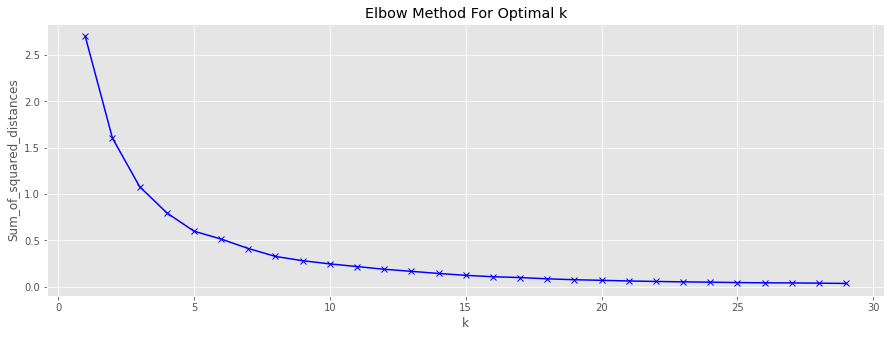

In [24]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()